In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
df = pd.read_csv('/Users/micahevalt/Downloads/marketing_and_sales_data_evaluate_lr.csv')

In [5]:
df.head(5)

,TV,Radio,Social_Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181


In [6]:
df.describe()

,TV,Radio,Social_Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [7]:
# remove columns for which Sales (i.e. dependent variable) data is missing


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social_Media  4566 non-null   float64
 3   Sales         4566 non-null   float64
dtypes: float64(4)
memory usage: 143.0 KB


In [19]:
df_sub = df[df['Sales'].notnull()]
df_sub

,TV,Radio,Social_Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181
...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866
4568,71.0,20.610685,6.545573,249.101915
4569,44.0,19.800072,5.096192,163.631457
4570,71.0,17.534640,1.940873,253.610411


<Axes: xlabel='Sales', ylabel='Count'>

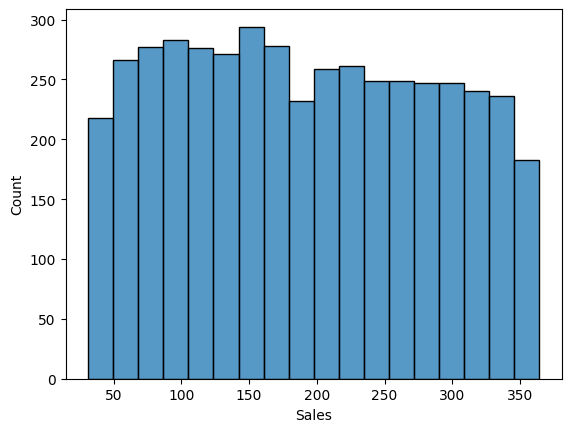

In [21]:
# create histogram of distribution of sales data
sns.histplot(df['Sales'])

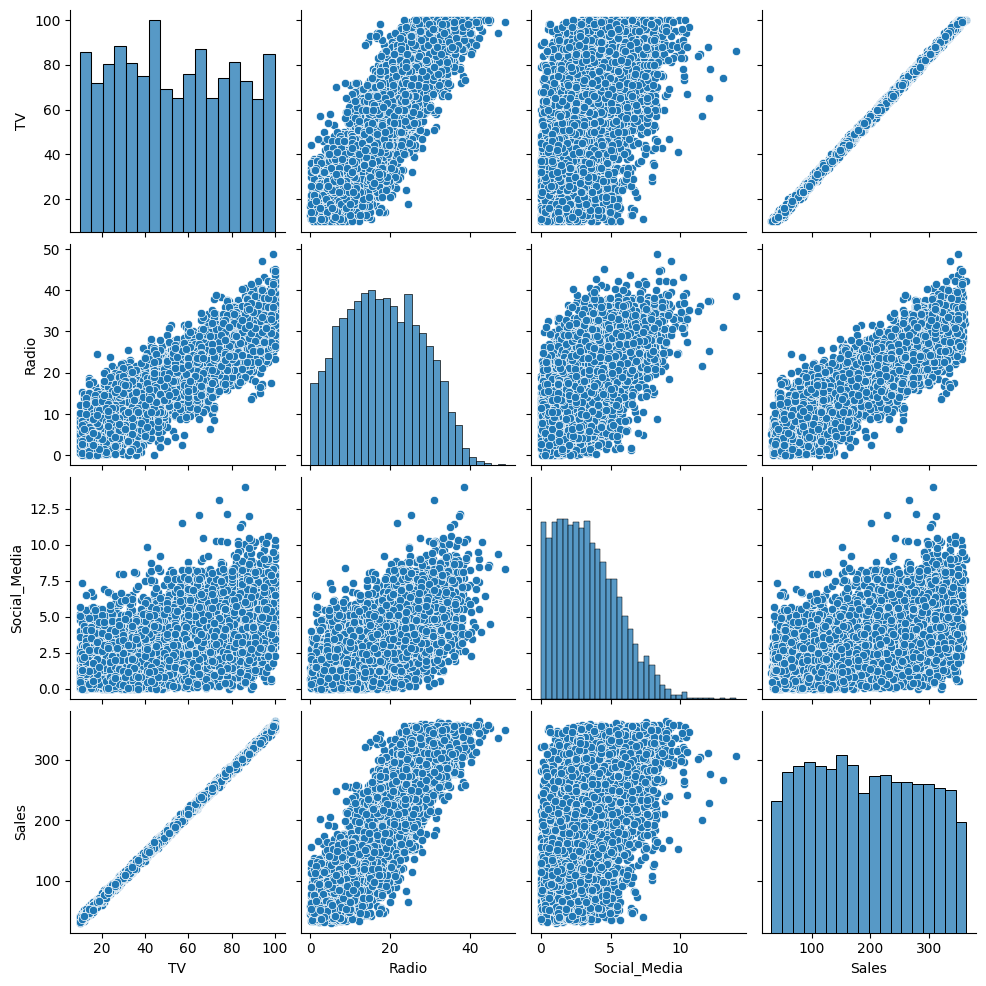

In [22]:
sns.pairplot(df_sub)

In [23]:
# TV and Sales have a great linear relationship!

In [38]:
ols_formula = "Sales ~ TV"
OLS = ols(formula = ols_formula, data = df_sub)
model = OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Sat, 24 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:34:25   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# Sales = -0.12 + 3.56 * TV
# still need to confirm normality of errors and homoscedasticity
residuals = model.resid
predicted_values = model.predict(df_sub) # don't actually have to specity TV column here b/c it's ingrained in the model
predicted_values

0        56.856252
1        46.172019
2       145.891529
3       295.470794
4        53.294841
           ...    
4567     92.470363
4568    252.733861
4569    156.575762
4570    252.733861
4571    149.452940
Length: 4566, dtype: float64

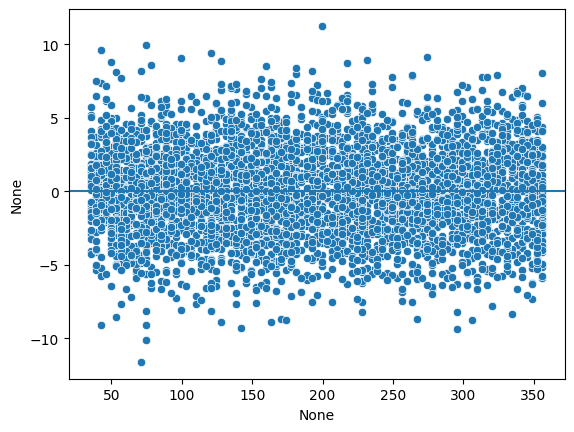

In [45]:
fig = sns.scatterplot(x = predicted_values, y = residuals)
fig.axhline(0)

<Axes: ylabel='Count'>

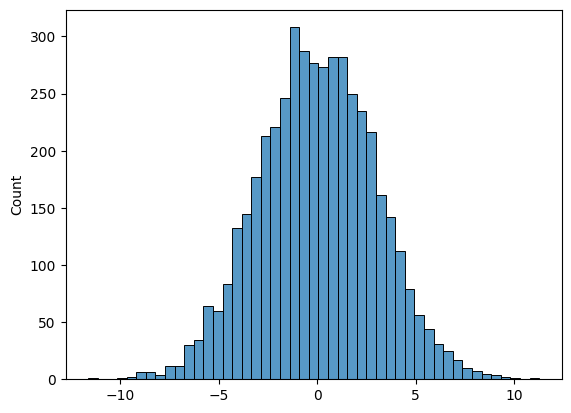

In [53]:
# homoscedasticity confirmed. Now to check normality of errors
sns.histplot(model.resid)

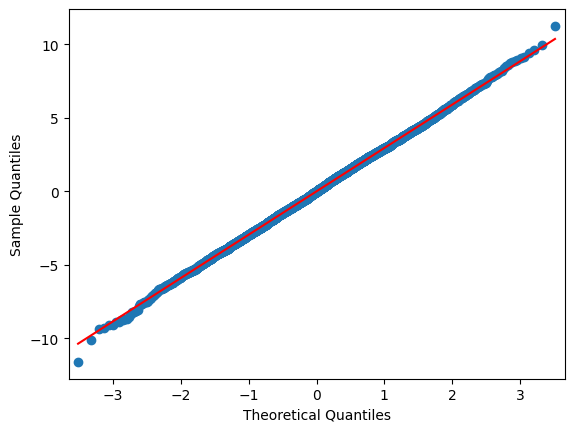

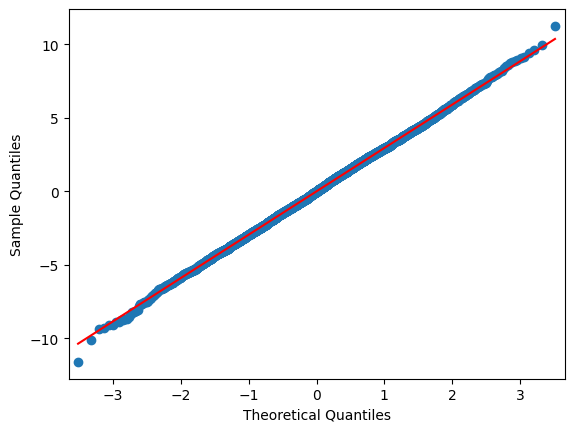

In [52]:
# looks good! remember to double check normality histograms with a qq plot
sm.qqplot(residuals, line = 's')

<Axes: xlabel='TV', ylabel='Sales'>

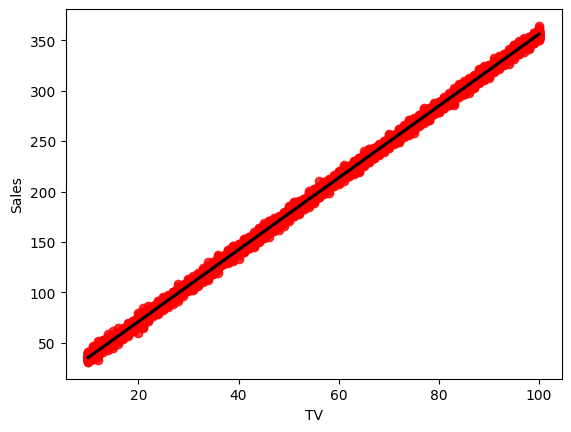

In [64]:
# Here's our data!

sns.regplot(data = df_sub, x = 'TV', y = 'Sales', line_kws = {"color": "black"},
           scatter_kws = {"color":"red"})
# for seaborn regplots, use arguments "line_kws" and "scatter_kws" to assign colors to the line and dots